![penguins](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png)

https://github.com/allisonhorst/palmerpenguins

In [1]:
import pandas as pd

df = pd.read_csv('penguins.csv') 
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis exploratorio

In [3]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<AxesSubplot:xlabel='species', ylabel='count'>

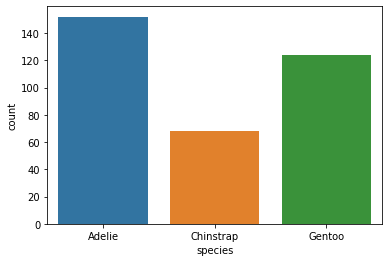

In [5]:
sns.countplot(x='species', data=df)

### Desbalanceo de las clases

<AxesSubplot:xlabel='island', ylabel='count'>

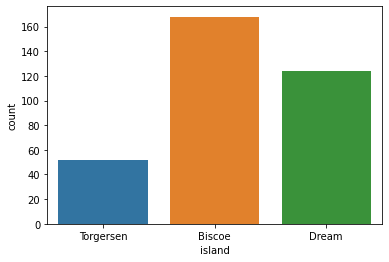

In [6]:
sns.countplot(x='island', data=df)

Viendo este gráfico podemos obserar que aunque en Island Biscoe es donde más población no necesariamente los pungüinos de la especie Adelie sean los únicos viviendo en esa isla, por tanto, da la impresión de no ser un dato relevante.

<AxesSubplot:xlabel='sex', ylabel='count'>

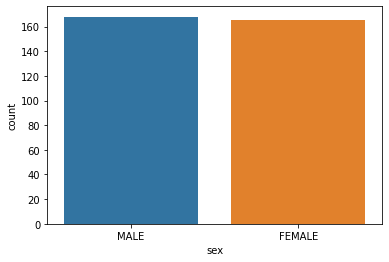

In [7]:
sns.countplot(x='sex', data=df)

Son valores muy similares, no me parece relevante para saber su especie

### Exploración de las variables

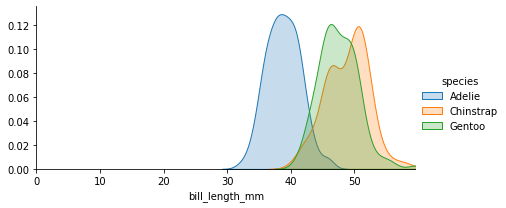

In [8]:
sns_plt = sns.FacetGrid(df, hue="species",aspect=2)
sns_plt.map(sns.kdeplot,'bill_length_mm',shade= True)
sns_plt.set(xlim=(0, df['bill_length_mm'].max()))
sns_plt.add_legend()

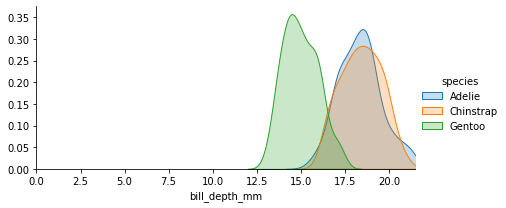

In [9]:
sns_plt = sns.FacetGrid(df, hue="species",aspect=2)
sns_plt.map(sns.kdeplot,'bill_depth_mm',shade= True)
sns_plt.set(xlim=(0, df['bill_depth_mm'].max()))
sns_plt.add_legend()

Aquí se puede ver cómo cada especie de pingüino tiene unas características propias en el pico, la especia Adelie tiene la tendencia a tener el pico más corto, pero más profundo, meintras que la especie Chinstrap tiene un pico largo y profundo y la especie Gentoo tienen un pico largo y menos profundo.

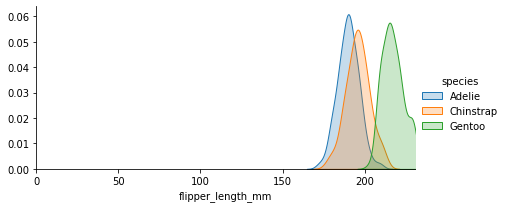

In [10]:
sns_plt = sns.FacetGrid(df, hue="species",aspect=2)
sns_plt.map(sns.kdeplot,'flipper_length_mm',shade= True)
sns_plt.set(xlim=(0, df['flipper_length_mm'].max()))
sns_plt.add_legend()

Con el tamaño de las aletas se ve que cada especie tiene tendencia a un tamaño específico.

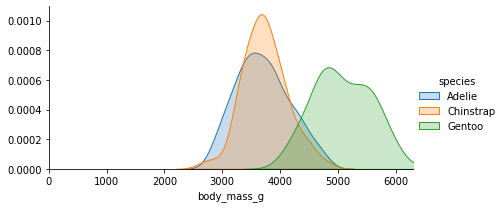

In [11]:
sns_plt = sns.FacetGrid(df, hue="species",aspect=2)
sns_plt.map(sns.kdeplot,'body_mass_g',shade= True)
sns_plt.set(xlim=(0, df['body_mass_g'].max()))
sns_plt.add_legend()

Con la masa corporal se observa que hay dos especies que la comparten.

## Preprocesamiento

### Valores nulos

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
sex,11,3.2
bill_length_mm,2,0.6
bill_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6
species,0,0.0
island,0,0.0


El número de valores nulos es apenas un 5.6, suponiendo que hay dos que no tengan ningún campo rellenado y sex teniendo algunos nulos, pero al ser tan pocos no los considero relevantes, como sex no es una variable que me interese, simplemente la excluiré después y las dos líneas que tienen toda la fila nula las quitaré.

In [13]:


df = df.dropna()

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [14]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### Distintos órdenes de magnitud

Ahora normalizaremos el campo body_mass_g ya que es el que tiene el valor más dispar en relación a los demás.

In [15]:
from sklearn.preprocessing import Normalizer
nBody_mass_g = df[["body_mass_g"]]

norm = Normalizer(norm='l2')

df['nBody_mass_g'] = norm.fit_transform(nBody_mass_g.values.reshape(1, -1))[0]

df.head()

c:\users\jose\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,nBody_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.047978
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.048618
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.041581
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.044140
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0.046699


In [16]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,nBody_mass_g
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,0.053826
std,5.468668,1.969235,14.015765,805.215802,0.010302
min,32.100000,13.100000,172.000000,2700.000000,0.034544
25%,39.500000,15.600000,190.000000,3550.000000,0.045419
50%,44.500000,17.300000,197.000000,4050.000000,0.051816
75%,48.600000,18.700000,213.000000,4775.000000,0.061092
max,59.600000,21.500000,231.000000,6300.000000,0.080603


## Selección de variables

In [17]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,nBody_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.047978
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.048618
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.041581
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.044140
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0.046699


Dejamos solo los campos para el pico y la aleta, ya que parecen ser los más identificativos para cada especie. La masa corporal decido dejarla fuera ya que compartían demasiado entre las 3 especies los mismos valores.

In [18]:
df = df.drop(columns=['island','body_mass_g', 'sex', 'nBody_mass_g'])
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,39.1,18.7,181.0
1,Adelie,39.5,17.4,186.0
2,Adelie,40.3,18.0,195.0
4,Adelie,36.7,19.3,193.0
5,Adelie,39.3,20.6,190.0


<AxesSubplot:>

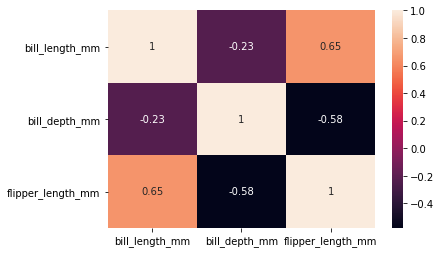

In [19]:
sns.heatmap(df.corr(), annot=True, cbar=True)

## Entrenamiento de los modelos

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

def show_metrics(clf, y_test, y_pred):
    print(f'Accuracy score: {int(accuracy_score(y_test, y_pred)*100)}%\n')
    print(classification_report(y_test, y_pred))
    
    disp = plot_confusion_matrix(clf, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()

### Regresión logística

Accuracy score: 98%

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      0.97      0.99        34

    accuracy                           0.98       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



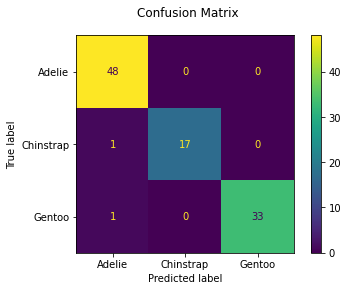

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

show_metrics(logreg, y_test, y_pred)

### Naïve Bayes

Accuracy score: 98%

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.89      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100



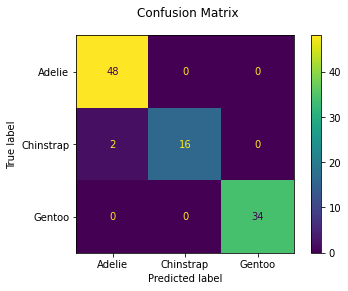

In [23]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)  

show_metrics(gaussian, y_test, y_pred)

### Decision tree

Accuracy score: 98%

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        48
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.98      0.98      0.98       100



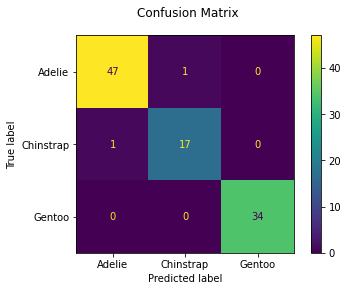

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)  

show_metrics(decision_tree, y_test, y_pred)

### Random forest

Accuracy score: 99%

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



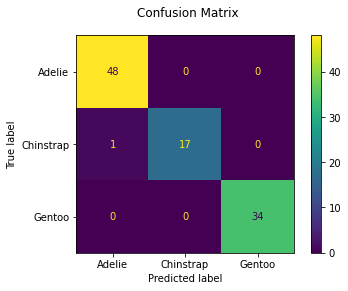

In [25]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

show_metrics(random_forest, y_test, y_pred)

In [28]:
importances = pd.DataFrame({'feature':X_train.columns, 
                            'importance':np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
bill_length_mm,0.439
flipper_length_mm,0.293
bill_depth_mm,0.268


Accuracy score: 98%

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      0.97      0.99        34

    accuracy                           0.98       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



c:\users\jose\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


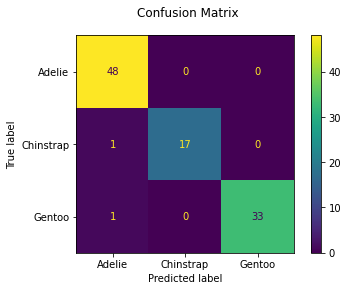

In [27]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC(max_iter=1000000)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

show_metrics(linear_svc, y_test, y_pred)

Se puede observar que con cada método de clasificación da un accuracy idéntica o muy similar, fallando en solo un o dos casos, confundiendo en casi todos ellos la especie Chinstrap con la especie Adelie.